In [1]:
import pandas as pd
vigencias = pd.read_csv('vigencias_scores.csv')
vigencias.head()

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral,rank
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000,ruim
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685,regular
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,otimo
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814,otimo
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403,bom


In [2]:
X = vigencias.drop(['rank'], axis=1)
y = vigencias['rank']

X.head()

,id_vei,id_uo_vei,id_motorista,id_uo_motorista,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,score_geral
0,66486,2855,636779.0,2950.0,234.420,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,50.000000
1,8155,3321,636786.0,2950.0,114.083,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.962685
2,8577,3327,636592.0,2950.0,183.725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
3,7665,3581,636644.0,2950.0,702.525,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.437814
4,8427,2868,636989.0,2950.0,175.290,0.0,0.0,1.0,3.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.308403


In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

/home/vitorbezerra/miniconda3/envs/amb1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.800

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__presort': True, 'pca__n_components': 12}


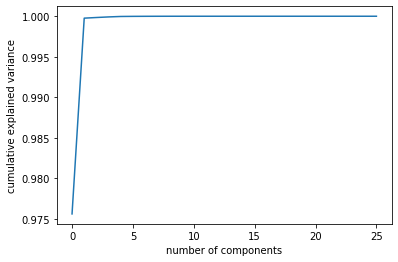

In [24]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:
pipetree = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('clf', DecisionTreeClassifier())])

#pipe = [pipe_knn, pipetre]
pipe = [pipetree]

param_range = [1, 2, 3, 4, 5]
pca_range = [5]

# grid search params
#grid_params = [{'clf__criterion': ['gini', 'entropy'],
#               'clf__presort': [True, False]}]
grid_params = [{'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': param_range,
    'clf__max_depth': param_range,
    'clf__min_samples_split': param_range[1:],
    'clf__presort': [True, False], 'pca__n_components': pca_range}]

# Construct grid search
gs = GridSearchCV(estimator=pipetree,
    param_grid=grid_params,
    scoring='accuracy', n_jobs=-1)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

/home/vitorbezerra/miniconda3/envs/amb1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.810

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 4, 'clf__presort': False, 'pca__n_components': 5}


In [27]:
pipetree = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('clf', DecisionTreeClassifier())])

#pipe = [pipe_knn, pipetre]
pipe = [pipetree]

param_range = [1, 2, 3, 4, 5]
pca_range = range(2,25)

# grid search params
#grid_params = [{'clf__criterion': ['gini', 'entropy'],
#               'clf__presort': [True, False]}]
grid_params = [{'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': param_range,
    'clf__max_depth': param_range,
    'clf__min_samples_split': param_range[1:],
    'clf__presort': [True, False], 'pca__n_components': pca_range}]

# Construct grid search
gs = GridSearchCV(estimator=pipetree,
    param_grid=grid_params,
    scoring='accuracy', n_jobs=-1)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

/home/vitorbezerra/miniconda3/envs/amb1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best accuracy: 0.861

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__presort': True, 'pca__n_components': 20}
